図14.5のプロット

In [1]:
#計算とグラフプロットに必要なモジュールの読み込み
import numpy as np
from control import matlab
from matplotlib import pyplot as plt
from scipy import arange 
from scipy import signal

In [2]:
#制御対象の分子・分母多項式と伝達関数表現を与える
num = [0, 0, 20] #分子多項式
den = [1, 11, 10] #分母多項式
L0 = matlab.tf(num, den) #伝達関数表現

#コントローラC_0の分子・分母多項式を与える．
numc0 = [ 1 ]; #C_0の分子多項式
denc0 = [ 1 ]; #C_0の分母多項式

#コントローラC_1=K_pの分子・分母多項式を与える．
numc1 = [ 10 ]; #C_1の分子多項式
denc1 = [ 1 ]; #C_1の分母多項式

#位相遅れコントローラのパラメータと分子・分母多項式を与える
omega1 = 1; #ω_1=1
numPLG = [ 1, omega1 ]; #位相遅れコントローラの分子多項式
denPLG = [ 1, 0 ]; #位相遅れコントローラの分母多項式

#制御対象とコントローラの伝達関数表現を与える
sys = matlab.tf( num, den ); #制御対象の伝達関数表現
c0 = matlab.tf( numc0, denc0 ); #C_0の伝達関数表現
c1 = matlab.tf( numc1, denc1 ); #C_1の伝達関数表現
cPLG = matlab.tf( numPLG, denPLG ); #位相遅れコントローラの伝達関数表現

#開ループ伝達関数を求める
sysL0 = c0*sys; #L_0(s) = P(s)の場合の開ループ伝達関数
sysL1 = c1*sys; #L_1(s) = P(s)C_1(s)の場合の開ループ伝達関数
sysL2 = c1*cPLG*sys; #L_2(s) = P(s)C_2(s)の場合の開ループ伝達関数

[numL00, denL00] = matlab.tfdata(sysL0) #開ループ伝達関数の分子・分母多項式を抜き出す
numL0 =  numL00[0][0] #分子多項式におけるPythonの配列の処理
denL0 = denL00[0][0] #分母多項式におけるPythonの配列の処理

[numL11, denL11] = matlab.tfdata(sysL1) #開ループ伝達関数の分子・分母多項式を抜き出す
numL1 = numL11[0][0] #分子多項式におけるPythonの配列の処理
denL1 = denL11[0][0] #分母多項式におけるPythonの配列の処理

[numL22, denL22] = matlab.tfdata(sysL2) #開ループ伝達関数の分子・分母多項式を抜き出す
numL2 = numL22[0][0] #分子多項式におけるPythonの配列の処理
denL2 = denL22[0][0] #分母多項式におけるPythonの配列の処理

#各コントローラに対応した開ループ伝達関数を与える
sysLG0 = signal.lti(numL0, denL0) #L_0(s) = P(s)の場合の伝達関数（signal.ltiの場合）
sysLG1 = signal.lti(numL1, denL1) #L_1(s) = P(s)C_1(s)の場合の伝達関数（signal.ltiの場合）
sysLG2 = signal.lti(numL2, denL2) #L_2(s) = P(s)C_2(s)の場合の伝達関数（signal.ltiの場合）

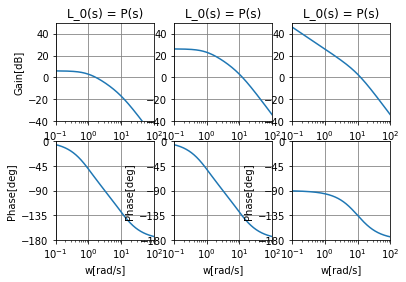

In [3]:
#角周波数の範囲を指定
w = np.logspace(-1, 2, 1000) #対数的に等間隔なベクトルの生成(10^{-1}から10^{2}で1000点)

#図14.5

#図14.5(a)

#ゲインと位相の計算
wL0, gainL0, phaseL0 = signal.bode(sysLG0, w) #ゲインと位相

#図14.5(a)のプロット
plt.subplot(2, 3, 1) #複数の図を並べるためのコマンド．2行3列の1行1列目という意味
plt.semilogx(wL0, gainL0) #ゲイン線図をプロット
plt.xlim([0.1,100]) #横軸（角周波数）の範囲の指定
plt.ylim([-25,50]) #縦軸の範囲の指定
plt.yticks([-40, -20, 0, 20, 40]) #縦軸の目盛りの値の設定
plt.grid(color='gray') #罫線を灰色で表示
#plt.xlabel("w[rad/s]") #横軸のラベル表示
plt.ylabel("Gain[dB]") #縦軸のラベル表示
plt.title("L_0(s) = P(s)") #タ イトルの表示

plt.subplot(2, 3, 4) #複数の図を並べるためのコマンド．2行3列の2行1列目という意味
plt.semilogx(wL0, phaseL0) #ゲイン線図をプロット
plt.xlim([0.1,100]) #横軸（角周波数）の範囲の指定
plt.ylim([-180,0]) #縦軸の範囲の指定
plt.yticks([-180,-135,-90,-45,0]) #縦軸の目盛りの値の設定
plt.grid(color='gray') #罫線を灰色で表示
plt.xlabel("w[rad/s]") #横軸のラベル表示
plt.ylabel("Phase[deg]") #縦軸のラベル表示

#図14.5(b)

#ゲインと位相の計算
wL1, gainL1, phaseL1 = signal.bode(sysLG1, w) #ゲインと位相

#図14.5(b)のプロット
plt.subplot(2, 3, 2) #複数の図を並べるためのコマンド．2行3列の1行2列目という意味
plt.semilogx(wL1, gainL1) #ゲイン線図をプロット
plt.xlim([0.1,100]) #横軸（角周波数）の範囲の指定
plt.ylim([-25,50]) #縦軸の範囲の指定
plt.yticks([-40, -20, 0, 20, 40]) #縦軸の目盛りの値の設定
plt.grid(color='gray') #罫線を灰色で表示
#plt.xlabel("w[rad/s]") #横軸のラベル表示
#plt.ylabel("Gain[dB]") #縦軸のラベル表示
plt.title("L_0(s) = P(s)") #タ イトルの表示

plt.subplot(2, 3, 5) #複数の図を並べるためのコマンド．2行3列の2行2列目という意味
plt.semilogx(wL1, phaseL1) #ゲイン線図をプロット
plt.xlim([0.1,100]) #横軸（角周波数）の範囲の指定
plt.ylim([-180,0]) #縦軸の範囲の指定
plt.yticks([-180,-135,-90,-45,0]) #縦軸の目盛りの値の設定
plt.grid(color='gray') #罫線を灰色で表示
plt.xlabel("w[rad/s]") #横軸のラベル表示
plt.ylabel("Phase[deg]") #縦軸のラベル表示

#図14.5(c)

#ゲインと位相の計算
wL2, gainL2, phaseL2 = signal.bode(sysLG2, w) #ゲインと位相

#図14.5(c)のプロット
plt.subplot(2, 3, 3) #複数の図を並べるためのコマンド．2行3列の1行2列目という意味
plt.semilogx(wL2, gainL2) #ゲイン線図をプロット
plt.xlim([0.1,100]) #横軸（角周波数）の範囲の指定
plt.ylim([-25,50]) #縦軸の範囲の指定
plt.yticks([-40, -20, 0, 20, 40]) #縦軸の目盛りの値の設定
plt.grid(color='gray') #罫線を灰色で表示
#plt.xlabel("w[rad/s]") #横軸のラベル表示
#plt.ylabel("Gain[dB]") #縦軸のラベル表示
plt.title("L_0(s) = P(s)") #タ イトルの表示

plt.subplot(2, 3, 6) #複数の図を並べるためのコマンド．2行3列の2行2列目という意味
plt.semilogx(wL2, phaseL2) #ゲイン線図をプロット
plt.xlim([0.1,100]) #横軸（角周波数）の範囲の指定
plt.ylim([-180,0]) #縦軸の範囲の指定
plt.yticks([-180,-135,-90,-45,0]) #縦軸の目盛りの値の設定
plt.grid(color='gray') #罫線を灰色で表示
plt.xlabel("w[rad/s]") #横軸のラベル表示
plt.ylabel("Phase[deg]") #縦軸のラベル表示

plt.show()

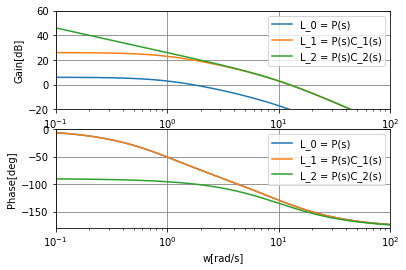

In [4]:
# ゲイン線図のプロット
plt.subplot(2, 1, 1) #2つの図を縦に並べるためのコマンド．2行1列の1行目という意味
plt.semilogx(wL0, gainL0, label="L_0 = P(s)") #ゲイン線図をプロット
plt.semilogx(wL1, gainL1, label="L_1 = P(s)C_1(s)") #ゲイン線図をプロット
plt.semilogx(wL2, gainL2, label="L_2 = P(s)C_2(s)") #ゲイン線図をプロット
plt.xlim([0.1,100]) #横軸（角周波数）の範囲の指定
plt.ylim([-20,60]) #縦軸の範囲の指定
plt.grid(color='gray') #罫線を灰色で表示
#plt.xlabel("w[rad/s]") #横軸のラベル表示
plt.ylabel("Gain[dB]") #縦軸のラベル表示
plt.legend() #凡例の表示

# 位相線図のプロット
plt.subplot(2, 1, 2) #2つの図を縦に並べるためのコマンド．2行1列の2行目という意味
plt.semilogx(wL0, phaseL0, label="L_0 = P(s)") #位相線図をプロット
plt.semilogx(wL1, phaseL1, label="L_1 = P(s)C_1(s)") #位相線図をプロット
plt.semilogx(wL2, phaseL2, label="L_2 = P(s)C_2(s)") #位相線図をプロット
plt.xlim([0.1,100]) #横軸（角周波数）の範囲の指定
plt.ylim([-180,0]) #縦軸の範囲の指定
plt.grid(color='gray') #罫線を灰色で表示
plt.xlabel("w[rad/s]") #横軸のラベル表示
plt.ylabel("Phase[deg]") #縦軸のラベル表示
plt.legend() #凡例の表示

plt.show() #グラフの表示

図14.6のプロット

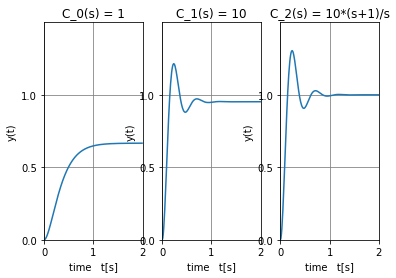

In [5]:
#各コントローラに対応した閉ループ伝達関数を与える
sysc0 = matlab.feedback(sysL0, 1, -1) #L_0(s) = P(s)の場合のフィードバック結合
sysc1 = matlab.feedback(sysL1, 1, -1) #L_1(s) = P(s)C_1(s)の場合のフィードバック結合
sysc2 = matlab.feedback(sysL2, 1, -1) #L_2(s) = P(s)C_2(s)の場合のフィードバック結合

#時間変数の定義
t = arange(0, 2, 0.01) #0から2まで0.01刻み

#各コントローラに対応したステップ応答を求める
y0, t0 = matlab.step(sysc0, t) #L_0(s) = P(s)の場合のステップ応答
y1, t1 = matlab.step(sysc1, t) #L_1(s) = P(s)C_1(s)場合のステップ応答
y2, t2 = matlab.step(sysc2, t) #L_2(s) = P(s)C_2(s)の場合のステップ応答

#図14.6(a)のプロット
plt.subplot(1,3,1) #複数の図を並べるためのコマンド．1行3列の1列目という意味
plt.plot(t0, y0) #ステップ応答をプロット
plt.xlim([0,2]) #横軸(時間軸）の範囲の指定
plt.ylim([0,1.5])  #縦軸の範囲の指定
plt.yticks([0,0.5,1.0]) #縦軸の目盛りの値の設定
plt.grid(color='gray') #罫線を灰色で表示
plt.xlabel("time   t[s]") #横軸のラベル表示
plt.ylabel("y(t)") #縦軸のラベル表示
plt.title("C_0(s) = 1") #タイトルの表示

#図14.6(b)のプロット
plt.subplot(1,3,2) #複数の図を並べるためのコマンド．1行3列の2列目という意味
plt.plot(t1, y1) #ステップ応答をプロット
plt.xlim([0,2]) #横軸(時間軸）の範囲の指定
plt.ylim([0,1.5])  #縦軸の範囲の指定
plt.yticks([0,0.5,1.0]) #縦軸の目盛りの値の設定
plt.grid(color='gray') #罫線を灰色で表示
plt.xlabel("time   t[s]") #横軸のラベル表示
plt.ylabel("y(t)") #縦軸のラベル表示
plt.title("C_1(s) = 10") #タイトルの表示

#図14.6(c)のプロット
plt.subplot(1,3,3) #複数の図を並べるためのコマンド．1行3列の3列目という意味
plt.plot(t2, y2) #ステップ応答をプロット
plt.xlim([0,2]) #横軸(時間軸）の範囲の指定
plt.ylim([0,1.5])  #縦軸の範囲の指定
plt.yticks([0,0.5,1.0]) #縦軸の目盛りの値の設定
plt.grid(color='gray') #罫線を灰色で表示
plt.xlabel("time   t[s]") #横軸のラベル表示
plt.ylabel("y(t)") #縦軸のラベル表示
plt.title("C_2(s) = 10*(s+1)/s") #タイトルの表示

plt.show() #グラフの表示

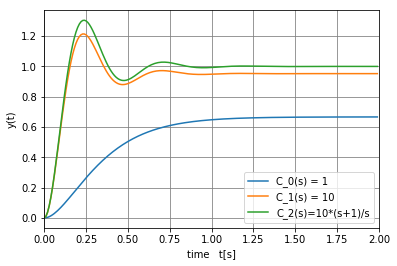

In [6]:
#図14.6のプロット

plt.plot(t0, y0, label = "C_0(s) = 1") #ステップ応答をプロット
plt.plot(t1, y1, label = "C_1(s) = 10") #ステップ応答をプロット
plt.plot(t2, y2, label = "C_2(s)=10*(s+1)/s") #ステップ応答をプロット
plt.xlim([0,2]) #横軸(時間軸）の範囲の指定
plt.grid(color='gray') #罫線を灰色で表示
plt.xlabel("time   t[s]") #横軸のラベル表示
plt.ylabel("y(t)") #縦軸のラベル表示
plt.legend() #凡例の表示

plt.show() #グラフの表示